# Multilayer Perceptron in Theano


### Contents

1. [Loading and preprocessing data](#data)
2. **Multilayer Perceptron** trained using different optimization methods
    * [Minibatch Stochastic Gradient Descent (SGD)](#minibatch_sgd)
    * [SGD with momentum](#momentum_sgd)
    * [SGD with Nesterov's method](#nesterov_sgd)
    * [SGD with rmsprop](#rmsprop_sgd)
3. [Visualizing weights of 1st layer](#viz)

In [15]:
cd ../../src

NameError: name 'cd' is not defined

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import theano
import theano.tensor as T

from fetch_mnist import preprocessed_mnist
from neural_nets.mlp import MultilayerPerceptron
from neural_nets.plotting_utils import Plotter

### The model 

The model uses regularization with $l_1$ and $l_2$ penalty, and is trained with gradient descent.

<a id='data'></a>

## Training on MNIST

In [3]:
X_train, X_test, y_train, y_test = preprocessed_mnist(random_state=0)

plotter = Plotter(X_test, y_test)

/opt/anaconda3/envs/nnets/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


## Common hyperparameters

In [4]:
hidden_sizes = [50, 25]

batch_size=2000

<a id='minibatch_sgd'></a>

## MLP with stochastic minibatch gradient descent

We use architecture with one hidden layer that has 50 neurons. ReLU is used as activation.

In [5]:
mlp = MultilayerPerceptron(
  n_iter=2500,
  hidden_sizes=hidden_sizes,
  batch_size=batch_size,
  lmbda=0.0005,
  l1_ratio=0.5,
  learning_rate=0.25,
  initialization_type='xavier')

%time mlp.fit(X_train, y_train)

CPU times: user 2min 1s, sys: 1.24 s, total: 2min 2s
Wall time: 1min 4s


Final loss: 0.1986
Final loss, smoothed: 0.2016


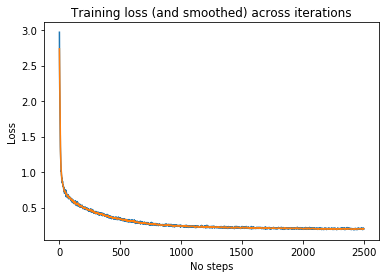

accuracy: 0.9728
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1381
          1       0.98      0.99      0.98      1575
          2       0.97      0.97      0.97      1398
          3       0.97      0.97      0.97      1428
          4       0.97      0.97      0.97      1365
          5       0.98      0.96      0.97      1263
          6       0.97      0.98      0.98      1375
          7       0.97      0.97      0.97      1458
          8       0.96      0.96      0.96      1365
          9       0.96      0.97      0.97      1392

avg / total       0.97      0.97      0.97     14000



In [6]:
plotter.plot_loss_and_accuracy(mlp)

<a id='momentum_sgd'></a>

## MLP with SGD and momentum

Note learning rate is 5x lower 

In [7]:
sgd_momentum_mlp = MultilayerPerceptron(
  n_iter=2500,
  hidden_sizes=hidden_sizes,
  batch_size=batch_size,
  lmbda=0.0005,
  l1_ratio=0.5,
  learning_rate=0.05,
  optimization_params={
    'method': 'momentum',
    'decay': 0.9})

%time sgd_momentum_mlp.fit(X_train, y_train)

CPU times: user 2min 1s, sys: 1.23 s, total: 2min 2s
Wall time: 1min 2s


Final loss: 0.2252
Final loss, smoothed: 0.2231


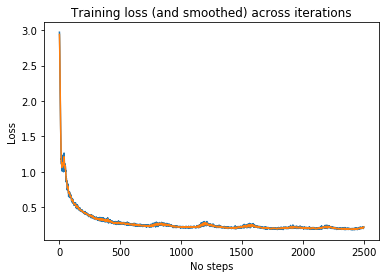

accuracy: 0.9640
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1381
          1       1.00      0.96      0.98      1575
          2       0.97      0.96      0.96      1398
          3       0.94      0.97      0.96      1428
          4       0.98      0.95      0.97      1365
          5       0.98      0.94      0.96      1263
          6       0.96      0.99      0.97      1375
          7       0.98      0.95      0.97      1458
          8       0.91      0.97      0.94      1365
          9       0.95      0.96      0.95      1392

avg / total       0.96      0.96      0.96     14000



In [8]:
plotter.plot_loss_and_accuracy(sgd_momentum_mlp)

<a id='nesterov_sgd'></a>

## MLP with SGD and Nesterov's accelerated gradient method 

In [9]:
sgd_nag_mlp = MultilayerPerceptron(
  n_iter=2500,
  hidden_sizes=hidden_sizes,
  batch_size=batch_size,
  lmbda=0.0005,
  l1_ratio=0.5,
  learning_rate=0.05,
  optimization_params={
    'method': 'nesterov',
    'decay': 0.9})

%time sgd_nag_mlp.fit(X_train, y_train)

CPU times: user 2min 5s, sys: 1.23 s, total: 2min 6s
Wall time: 1min 4s


Final loss: 0.2028
Final loss, smoothed: 0.2017


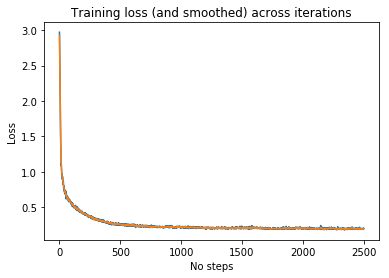

accuracy: 0.9729
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1381
          1       0.98      0.99      0.98      1575
          2       0.97      0.97      0.97      1398
          3       0.97      0.97      0.97      1428
          4       0.97      0.97      0.97      1365
          5       0.97      0.97      0.97      1263
          6       0.97      0.98      0.98      1375
          7       0.98      0.97      0.97      1458
          8       0.97      0.96      0.96      1365
          9       0.97      0.96      0.96      1392

avg / total       0.97      0.97      0.97     14000



In [10]:
plotter.plot_loss_and_accuracy(sgd_nag_mlp)

<a id='rmsprop_sgd'></a>

## MLP with SGD and rmsprop 

In [19]:
sgd_rmsprop_mlp = MultilayerPerceptron(
  n_iter=2500,
  hidden_sizes=hidden_sizes,
  batch_size=batch_size,
  lmbda=0.0005,
  l1_ratio=0.5,
  learning_rate=0.001,
  optimization_params={
    'method': 'rmsprop',
    'decay': 0.8})

%time sgd_rmsprop_mlp.fit(X_train, y_train)

CPU times: user 2min 50s, sys: 4.28 s, total: 2min 54s
Wall time: 1min 47s


Final loss: 0.2127
Final loss, smoothed: 0.2176


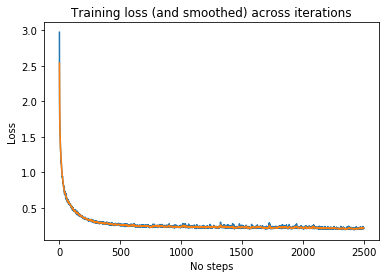

accuracy: 0.9739
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1381
          1       0.99      0.99      0.99      1575
          2       0.96      0.97      0.97      1398
          3       0.98      0.97      0.97      1428
          4       0.97      0.98      0.97      1365
          5       0.97      0.97      0.97      1263
          6       0.97      0.98      0.98      1375
          7       0.97      0.97      0.97      1458
          8       0.97      0.97      0.97      1365
          9       0.97      0.96      0.97      1392

avg / total       0.97      0.97      0.97     14000



In [20]:
plotter.plot_loss_and_accuracy(sgd_rmsprop_mlp)

<a id='viz'></a>

## Visualizing weights

We'll show weights for NAG method's hidden layer since it seems to perform best, and the weights seem to make most sense.

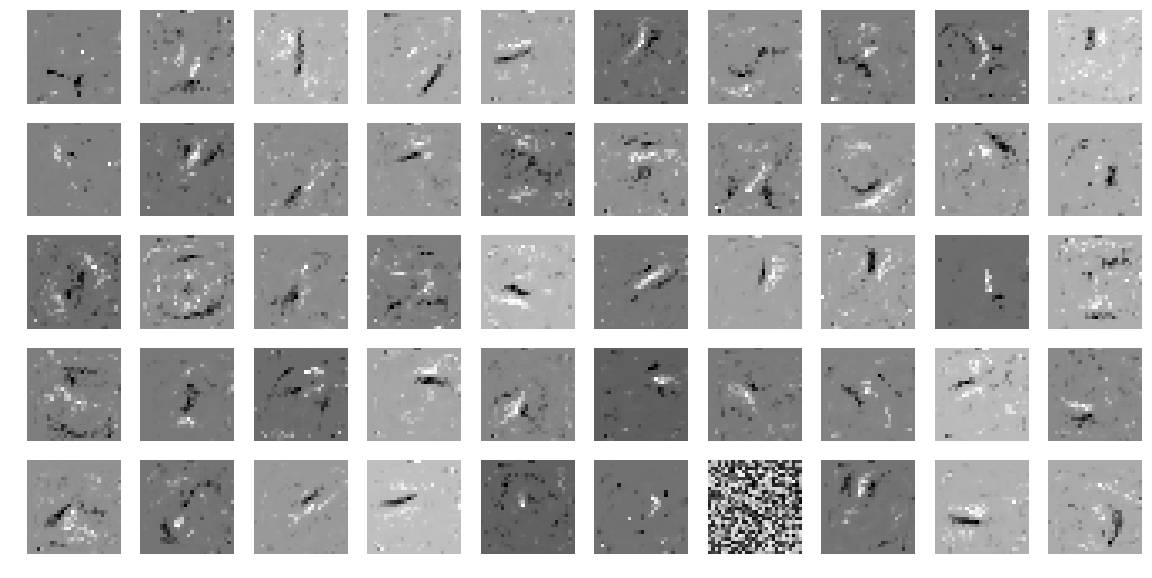

In [21]:
img_weights = sgd_rmsprop_mlp.weights[0].get_value().reshape(28, 28, 50)

f, axes = plt.subplots(5, 10, figsize=(20, 10))

for i in range(50):
  ax = axes[i % 5, i // 5]
  ax.imshow(img_weights[:, :, i], cmap='gray')
  ax.axis('off') 
  
plt.show()

## Comparing weights

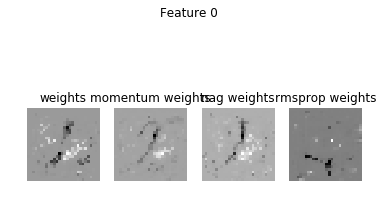

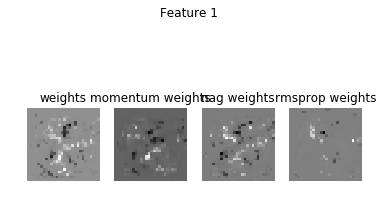

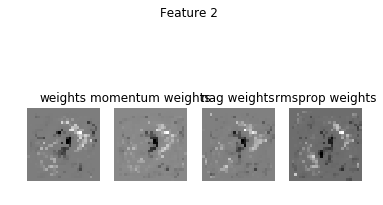

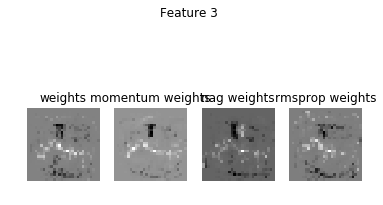

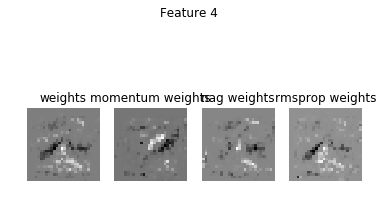

In [22]:
for i in range(5):
  digit_weights = mlp.weights[0].get_value().T[i, :].reshape(28, 28)
  momentum_digit_weights = sgd_momentum_mlp.weights[0].get_value().T[i, :].reshape(28, 28)
  nesterov_digit_weights = sgd_nag_mlp.weights[0].get_value().T[i, :].reshape(28, 28)
  rmsprop_digit_weights = sgd_rmsprop_mlp.weights[0].get_value().T[i, :].reshape(28, 28)
  f, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4)
  f.suptitle('Feature {}'.format(i)) 
  
  ax1.imshow(digit_weights , cmap='gray')
  ax1.set_title('weights')
  ax1.axis('off') 
  
  ax2.imshow(momentum_digit_weights, cmap='gray')
  ax2.set_title('momentum weights')
  ax2.axis('off') 
   
  ax3.imshow(nesterov_digit_weights, cmap='gray')
  ax3.set_title('nag weights')
  ax3.axis('off') 
  
  ax4.imshow(rmsprop_digit_weights, cmap='gray')
  ax4.set_title('rmsprop weights')
  ax4.axis('off') 
  plt.show()